In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

C:\Users\Strange_10_ARROW\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Strange_10_ARROW\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Strange_10_ARROW\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Strange_10_ARROW\Anaconda3\lib\site-packages\tensorflow\python\f

In [2]:
img = image.load_img("C:/Users/Strange_10_ARROW/ImageDataset/BaseData/Training/Fair/567.jpg")

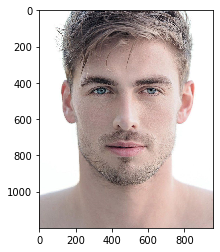

In [3]:
#RGB Image

plt.imshow(img)

In [4]:
#3D matrix

cv2.imread("C:/Users/Strange_10_ARROW/ImageDataset/BaseData/Training/Fair/567.jpg")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[155, 157, 165],
        [155, 157, 165],
        [155, 157, 165],
        ...,
        [182, 186, 210],
        [182, 186, 210],
        [184, 189, 210]],

       [[156, 158, 166],
        [155, 157, 165],
        [155, 157, 165],
        ...,
        [182, 186, 210],
        [183, 187, 211],
        [183, 188, 209]],

       [[156, 158, 166],
        [156, 158, 166],
        [155, 157, 165],
        ...,
        [182, 186, 210],
        [183, 187, 211],
        [183, 188, 209]]

In [5]:
#Shape of the matrix  (Height,Width,Number of Colours)

cv2.imread("C:/Users/Strange_10_ARROW/ImageDataset/BaseData/Training/Fair/567.jpg").shape

(1200, 961, 3)

In [6]:
#Initialise classes for training
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255) 

In [7]:
#Convert training images to a dataset that can be fitted to your neural network
train_dataset = train.flow_from_directory("C:/Users/Strange_10_ARROW/ImageDataset/BaseData/Training/",
                                          target_size= (200,200),
                                          batch_size=10,
                                          class_mode='categorical')



validation_dataset = train.flow_from_directory("C:/Users/Strange_10_ARROW/ImageDataset/BaseData/Validation/",
                                          target_size= (200,200),
                                          batch_size=10,
                                          class_mode='categorical')

Found 119 images belonging to 3 classes.
Found 119 images belonging to 3 classes.


In [8]:
#Dark is indexed as '0' , Fair is indexed as '1' and Mild is indexed as '2'

train_dataset.class_indices

{'Dark': 0, 'Fair': 1, 'Mild': 2}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(3,activation = 'softmax')
                                    ])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
#Compile our model
model.compile(loss = "categorical_crossentropy",
              optimizer = 'adam',
              metrics =['accuracy'])

In [12]:
#Fitup the model
model_fit = model.fit(train_dataset,
                      steps_per_epoch=3,
                      epochs= 10,
                      validation_data=validation_dataset)

Epoch 1/10


C:\Users\Strange_10_ARROW\Anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3/3 [==============================] - 14s 5s/step - loss: 3.1936 - acc: 0.3448 - val_loss: 2.1954 - val_acc: 0.3193
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 1.7290 - acc: 0.3000 - val_loss: 1.0545 - val_acc: 0.4202
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 1.0893 - acc: 0.3667 - val_loss: 1.0551 - val_acc: 0.4370
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 1.1626 - acc: 0.2333 - val_loss: 1.0535 - val_acc: 0.6050
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 1.0429 - acc: 0.7667 - val_loss: 1.0365 - val_acc: 0.5042
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 1.0385 - acc: 0.5333 - val_loss: 1.0205 - val_acc: 0.3445
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 1.1047 - acc: 0.2667 - val_loss: 0.9850 - val_acc: 0.8908
Epoch 8/10
3/3 [==============================] - 6s 2s/step - loss: 1.0043 - acc: 0.7241 - val_loss: 0.9871 - val_acc: 0